<a href="https://colab.research.google.com/github/Himanshu0518/Machine-Learning/blob/main/13_Linear_Regression_from_scrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Y = wX + b

w --> weight

b --> bias

**Learning Rate**:-
step size at each iteration  while moving towards a minimum of a loss function

In [ ]:
import numpy as np

Linear Regression

In [ ]:
class Linear_Regression:

  def __init__(self,learningRate,no_of_iterations):
    self.learningRate = learningRate
    self.no_of_iterations = no_of_iterations


  def fit(self,X,Y):
     #no of training examples and features
     self.m,self.n = X.shape
     #weight and bias initialising
     self.w = np.zeros(self.n)
     self.b = 0
     self.X  = X
     self.Y = Y
     #gradient decent
     for i in range(self.no_of_iterations):
      self.update_wt()

  def update_wt(self):
    y_pred = self.predict(self.X)
    dw = -(2/self.m) * np.dot(self.X.T, (self.Y - y_pred))
    db = -(2/self.m) * np.sum(self.Y - y_pred)
    self.w = self.w - self.learningRate*dw
    self.b = self.b - self.learningRate*db

  def predict(self,X):
    Y_pred = np.dot(X,self.w) + self.b
    return Y_pred

Using Linearn regression model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/salary_data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
dataset.shape

(30, 2)

In [ ]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
X = dataset.drop('Salary',axis=1)
Y = dataset.Salary

In [ ]:
print(X[0:5])

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2


In [ ]:
print(Y[0:5])

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


In [ ]:
X_train.shape,X_test.shape,X.shape

((21, 1), (9, 1), (30, 1))

In [ ]:
model = Linear_Regression(learningRate = 0.02,no_of_iterations = 1000)

In [ ]:
model.fit(X_train,Y_train )

In [ ]:
print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  9202.381926446358
bias =  26048.58171638901


In [ ]:
# predicting the salary
Y_pred = model.predict(X_test)

In [ ]:
print(Y_test)

17     83088
21     98273
10     63218
19     93940
14     61111
20     91738
26    116969
3      43525
24    109431
Name: Salary, dtype: int64


In [ ]:
print(Y_pred)

[ 74821.20592655  91385.49339416  61937.87122953  81262.87327507
  67459.3003854   88624.77881622 113471.21001763  44453.34556928
 106109.30447647]


**Visualising the results**

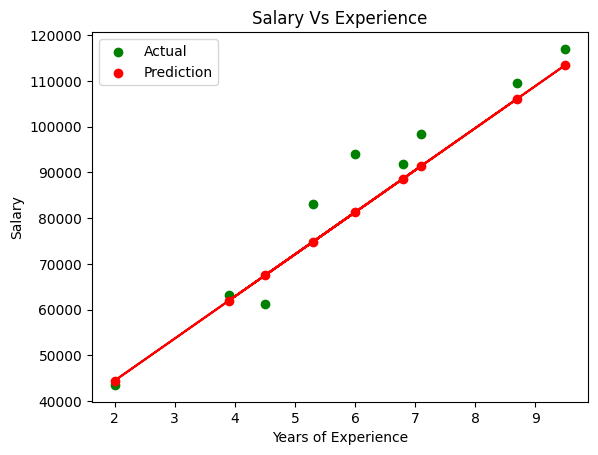

In [ ]:
plt.scatter(X_test,Y_test,color='g')
plt.scatter(X_test,Y_pred,color='r')
plt.plot(X_test,Y_pred,'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Vs Experience')
plt.legend(['Actual','Prediction'])
plt.show()